In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hidden_size = 10
vocab_size = 2

In [4]:
Wxh = np.random.randn(hidden_size, vocab_size) * 0.01
Whh = np.random.randn(hidden_size, hidden_size) * 0.01
Why = np.random.randn(vocab_size, hidden_size) * 0.01
bh = np.zeros((hidden_size, 1))
by = np.zeros((vocab_size, 1))

In [10]:
print(f'Wxh shape is: {Wxh.shape}')
print(f'Whh shape is: {Whh.shape}')
print(f'Why shape is: {Why.shape}')
print(f'bh shape is: {bh.shape}')
print(f'by shape is: {by.shape}')

Wxh shape is: (10, 2)
Whh shape is: (10, 10)
Why shape is: (2, 10)
bh shape is: (10, 1)
by shape is: (2, 1)


In [17]:
x = np.zeros((vocab_size, 1))
h = np.zeros((hidden_size, 1))
x[0] = 1
x.shape

(2, 1)

In [14]:
np.dot(Wxh, x).shape

(10, 1)

In [19]:
np.dot(Whh, h).shape

(10, 1)

In [20]:
bh.shape

(10, 1)

In [26]:
h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
h.shape

(10, 1)

In [27]:
by.shape

(2, 1)

In [30]:
y = np.dot(Why, h)
y.shape

(2, 1)

In [31]:
p = np.exp(y) / np.sum(np.exp(y))
p.shape

(2, 1)

In [33]:
y

array([[-1.54035127e-05],
       [ 3.54864885e-04]])

In [32]:
p

array([[0.49990743],
       [0.50009257]])

In [38]:
ix = np.random.choice(range(vocab_size), p=p.ravel())
ix

0

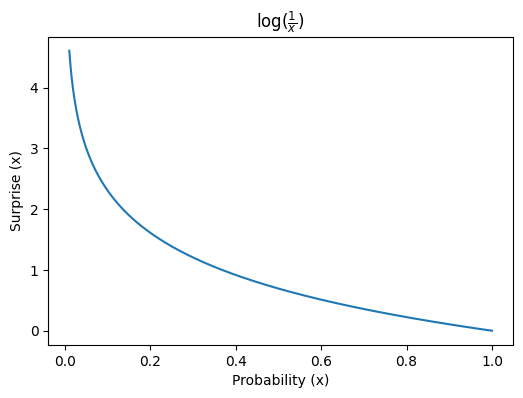

In [54]:
# Create a range of values for x
x = np.linspace(0.01, 1, 1000)  # x should be between 0 and 1 for probability distribution
y = np.log(1/x)

# Plotting the graph
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=r'$\log(\frac{1}{x})$')
plt.title(r'$\log(\frac{1}{x})$')
plt.xlabel('Probability (x)')
plt.ylabel(r'Surprise (x)')

# Show the plot
plt.show()

In [59]:
hidden_size = 5
vocab_size = 3
hprev = np.zeros((hidden_size, 1))
xs, hs, ys, ps = {}, {}, {}, {}
hs[-1] = np.copy(hprev)
loss = 0
hs

{-1: array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])}

In [76]:
inputs = [1, 2, 0]
targets = [2, 0, 1]
Wxh = np.random.randn(hidden_size, vocab_size) * 0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size) * 0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size) * 0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1))  # output bias

In [77]:
for t in range(3):
  xs[t] = np.zeros((vocab_size, 1))
  xs[t][inputs[t]] = 1
  print(f'input\n {xs[t]}')
  hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh)
  ys[t] = np.dot(Why, hs[t]) + by
  ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t]))
  print(f'ps\n {ps[t]}')
  loss = -np.log(ps[t][targets[t], 0])
  print(loss)

input
 [[0.]
 [1.]
 [0.]]
ps
 [[0.33338804]
 [0.33326451]
 [0.33334745]]
1.0985699522578372
input
 [[0.]
 [0.]
 [1.]]
ps
 [[0.3333062 ]
 [0.33335968]
 [0.33333412]]
1.0986936816553767
input
 [[1.]
 [0.]
 [0.]]
ps
 [[0.33334535]
 [0.33328392]
 [0.33337074]]
1.0987605485615883
